# TP2 - Reconnaissance de chiffres manuscrits par $k$ plus proches voisins

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et de la méthode des $k$ plus proches voisins. 
La base de données du MNIST{\footnote{http://yann.lecun.com/exdb/mnist/}} sur les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage (*database_train_images*) et un ensemble de 10 000 exemples de test (*database_test_images*).  Les chiffres, dont quelques exemples sont représentés sur la figure ci-dessous, ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

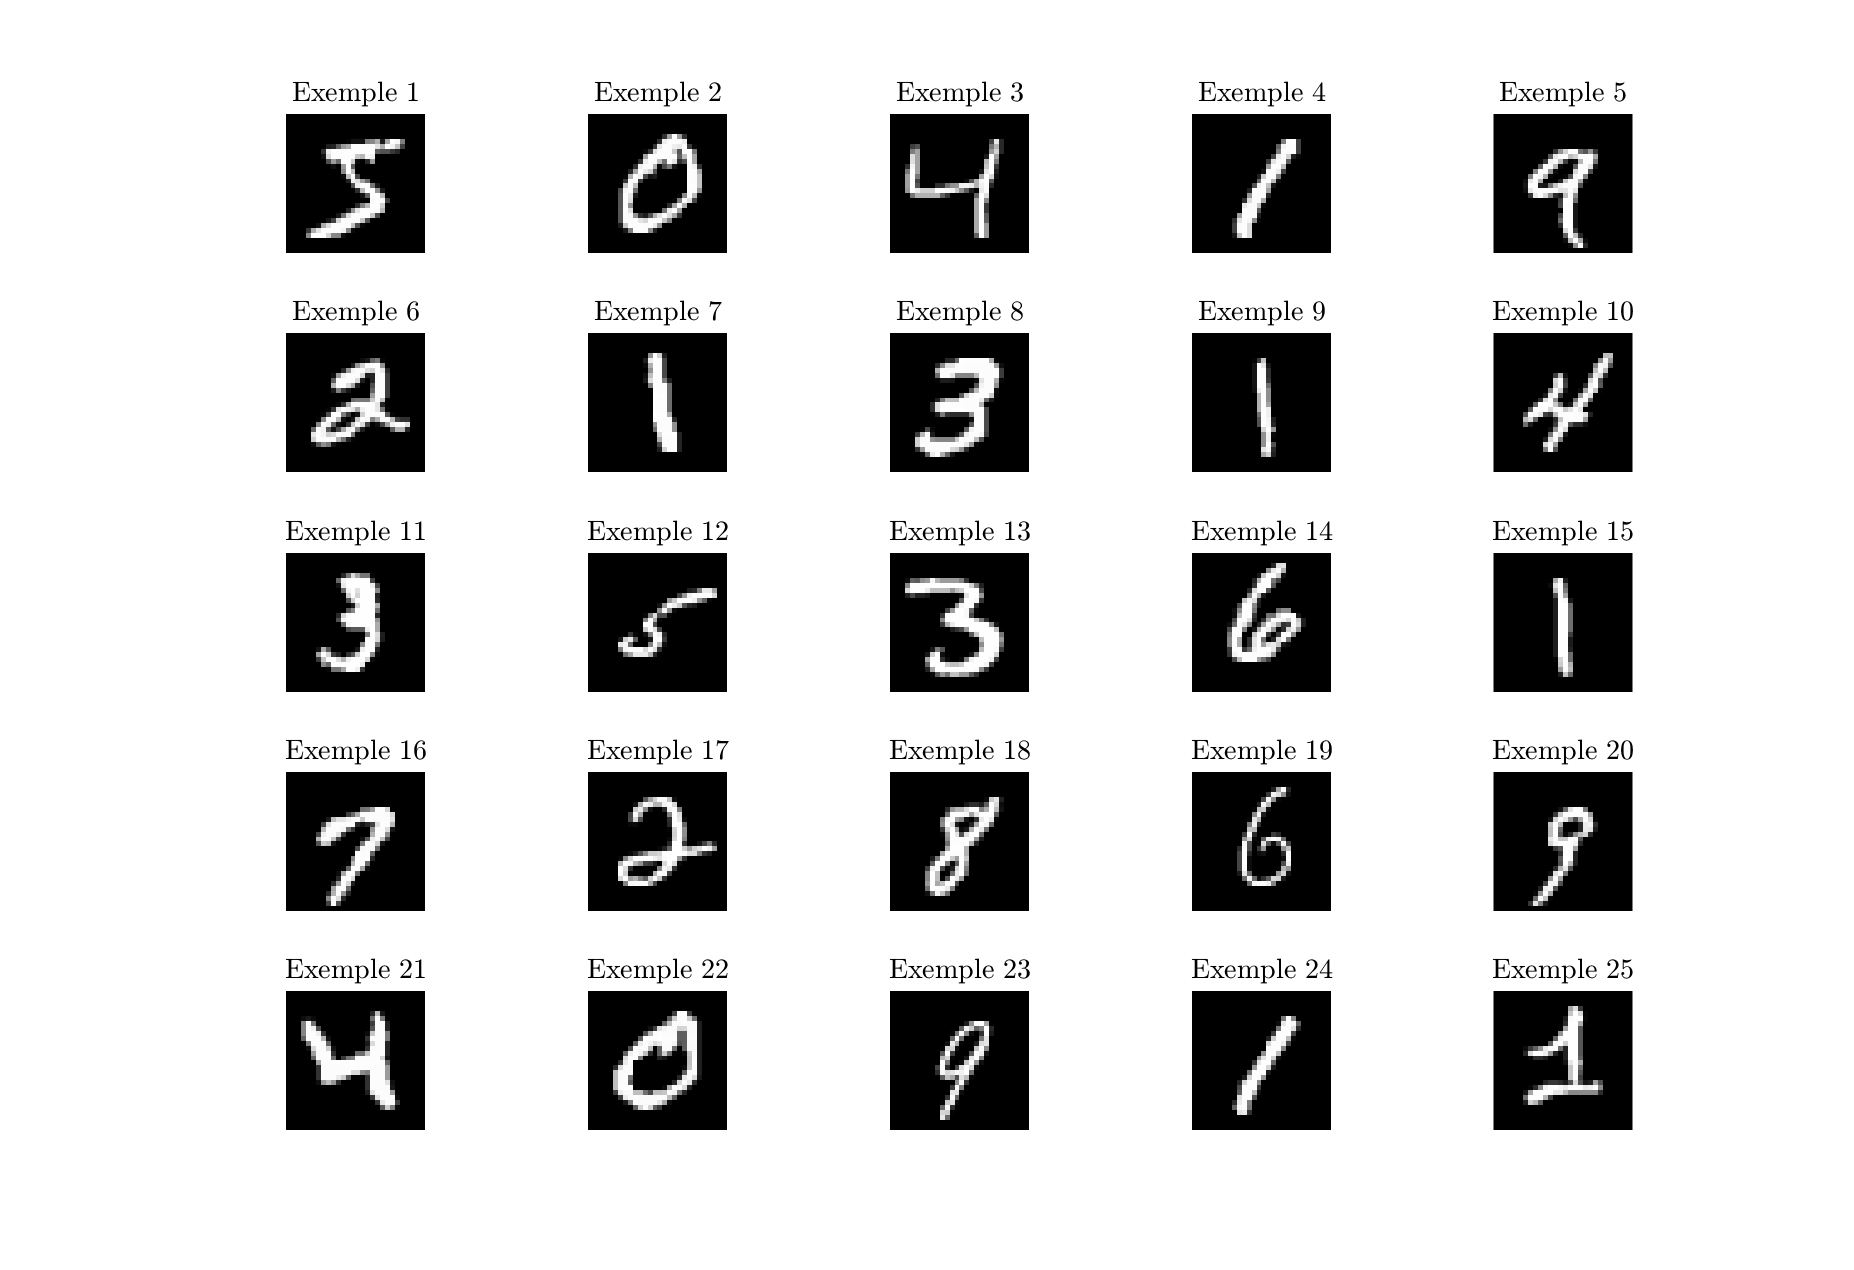




Chaque image est considérée comme un vecteur 1D de $28\times 28=784$ coordonnées. On fournit les labels des ensembles d'apprentissage (*y_train*) et de test 
(*y_test*).

In [ ]:
#pourcentage d'erreur MNIST k=3
#à la fin l'erreur doit etre 5.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import math
import scipy as sc
from sklearn.metrics.pairwise import euclidean_distances

### Chargement de la base de données MNIST

Lien du dataset des chiffres manuscrits :
http://yann.lecun.com/exdb/mnist/

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

X, y = mnist["data"], mnist["target"]

DataApp , DataTest , LabelApp , LabelTest = X[:60000] , X[60000:] , y[:60000] , y[60000:]

print('DataApp: ' + str(DataApp.shape))
print('LabelApp: ' + str(LabelApp.shape))
print('DataTest:  '  + str(DataTest.shape))
print('LabelTest:  '  + str(LabelTest.shape))

# Conversion en matrices
DataApp=np.asarray(DataApp)
DataTest=np.asarray(DataTest)
LabelApp=np.asarray(LabelApp)
LabelTest=np.asarray(LabelTest)

DataApp: (60000, 784)
LabelApp: (60000,)
DataTest:  (10000, 784)
LabelTest:  (10000,)


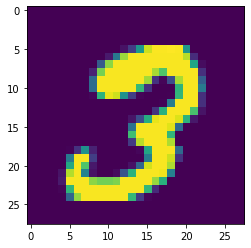

le label de cette image d'apprentissage est : 3


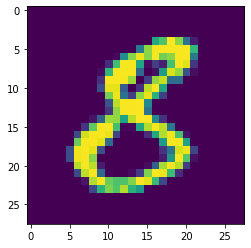

le label de cette image de test est : 8


In [ ]:
# Affichage d'images de ce jeu de données : 
# on affiche une donnée image de X_train et X_test :
NumImageTrain = 12345 # à choisir entre 0 et 59999
Exple1 = DataApp[NumImageTrain,:] # on a choisi un exemple one i of NumImageTrain , all j
ImExple1 = np.reshape(Exple1,[28,28]) 
plt.imshow(ImExple1)
plt.show()
print("le label de cette image d'apprentissage est :", LabelApp[NumImageTrain])

NumImageTest=1234 # à choisir entre 0 et 9999
Exple2=DataTest[NumImageTest,:]
ImExple2=np.reshape(Exple2,[28,28])
plt.imshow(ImExple2)
plt.show()
print("le label de cette image de test est :", LabelTest[NumImageTest])

## Exercice 1 : méthode des $k$ plus proches voisins

En intelligence artificielle, la méthode des $k$ plus proches voisins  ($k$-ppv) est une méthode d'apprentissage supervisé. 
Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples « donnée-label ». Pour estimer la sortie associée à une nouvelle entrée $x$, la méthode des $k$ plus proches voisins consiste à prendre en compte (de façon identique) les $k$ échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle entrée $x$, selon une distance à définir. L'algorithme  associé  et un exemple sont donnés par la suite.


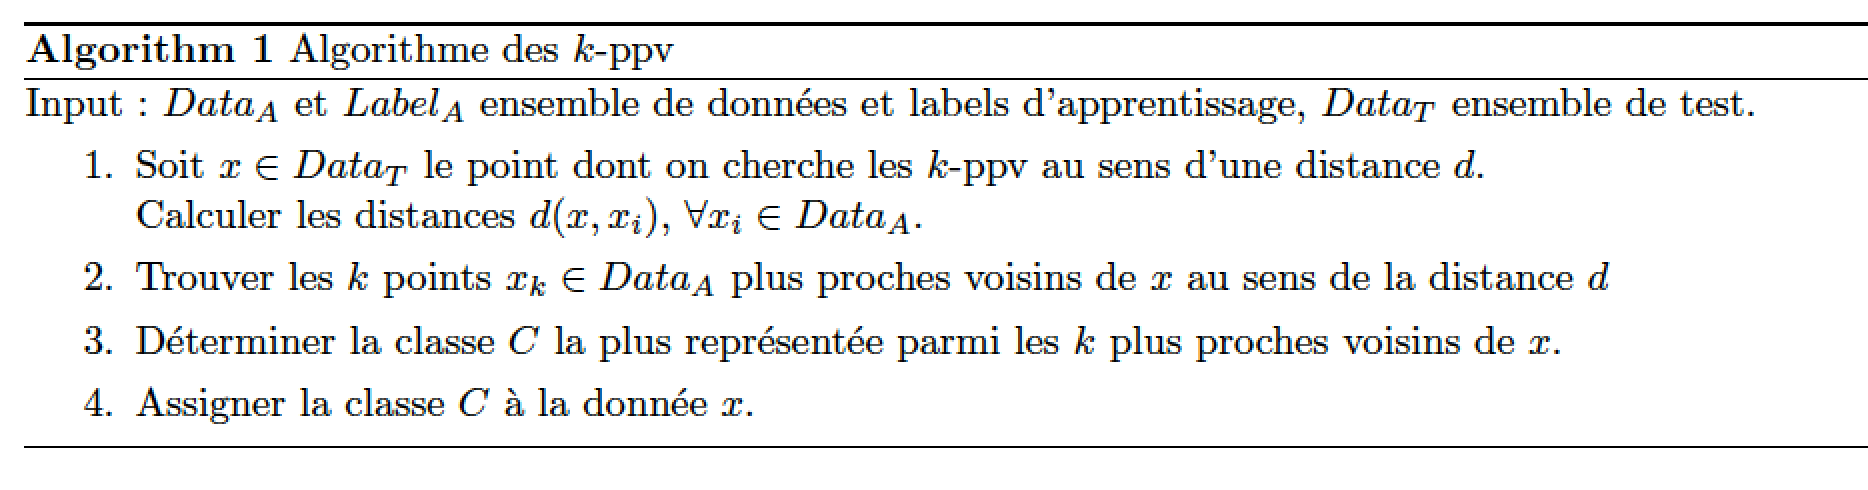

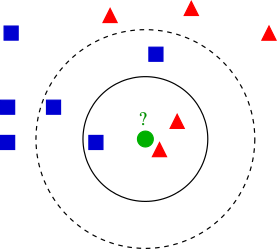


**Exemple de classification $k$-ppv:** L'échantillon de test (cercle vert) doit être classé soit dans la première classe des carrés bleus, soit dans la deuxième classe des triangles rouges. Si k = 3 (cercle plein), il est assigné à la deuxième classe parce qu'il y a 2 triangles et seulement 1 carré à l'intérieur du cercle intérieur. Si k = 5 (cercle en pointillés), il est assigné à la première classe (3 carrés contre 2 triangles à l'intérieur du cercle extérieur)

**Question :**
En utilisant la distance euclidienne, complétez la fonction *kppv* permettant d'effectuer la classification par $k$-ppv sur un ensemble de test à partir d'un ensemble d'apprentissage et de leurs labels et en spécifiant le nombre $k$  voisins que l'on cherche.  



### Fonctions python intéressantes : 
Liste de fonctions (librairies) :

- euclidean_distance (sklearn) 
- mode (scipy.stats) [à changer pour traiter le cas d'égalité]
- argsort (numpy)


In [ ]:
from scipy.spatial import distance

def kppv(DataApp, DataTest,labelApp, K, Nt_test, affichage):

    Na = DataApp.shape[0] #60000
    Nt = DataTest.shape[0] #10000

    # Initialisation du vecteur d'etiquetage des images tests
    Partition = np.zeros((Nt_test,1))

    # Boucle sur les vecteurs test de l'ensemble de l'evaluation
    list_distances = []
    for i in range(Nt_test):

        # Calcul des distances entre les vecteurs de test 
        # et les vecteurs d'apprentissage (voisins)
        # A COMPLETER
        #vec_distances = euclidean_distances(DataTest[i].reshape([784,1]), DataApp)
        vec_distances = [distance.euclidean(DataTest[i].reshape([784,1]), j.reshape([784,1])) for j in DataApp]

        # On ne garde que les indices des K + proches voisins
        # A COMPLETER
        indices_list = np.argsort(vec_distances)[:K]
        
        # Comptage du nombre de voisins appartenant a chaque classe
        # A COMPLETER
        ppv_list = [labelApp[i] for i in indices_list]
        
        # Recherche de la classe contenant le maximum de voisins
        # Si l'image test a le plus grand nombre de voisins dans plusieurs  
        # classes differentes, alors on lui assigne celle du voisin le + proche,
        # sinon on lui assigne l'unique classe contenant le plus de voisins 
        # A COMPLETER
        most_frequency = 0
        label_ppv = ppv_list[0]
      
        for v in ppv_list:
            counter = ppv_list.count(v)
            if(counter > most_frequency):
              most_frequency = counter
              label_ppv = v     

        # Assignation de l'etiquette correspondant ‡ la classe trouvee au point 
        # correspondant a la i-eme image test dans le vecteur "Partition" 
        # A  COMPLETER
        if affichage : 
          print('Image test n',i)
          print("true label : ", LabelTest[i])
          print("predicted label : ",label_ppv)
          print('________________________________')
        Partition[i] = label_ppv

    return Partition

In [ ]:
# Choix du nombre de voisins
K = 3;

# Nombre de données à tester
Nt=DataTest.shape[0]
Nt_test = int(Nt/1000); # A changer, pouvant aller jusqu'a Nt

# Classement par aux k-ppv
Partition = kppv(DataApp, DataTest, LabelApp , K, Nt_test, True);

# Affichage des résultats de prédiction et de vérité terrainMatriceConfusion=np.zeros((10,10))
#print('Resultat Kppv',Partitioµn.T)
#print('Vérité terrain',LabelTest[:Nt_test])

Image test n 0
true label :  7
predicted label :  7
________________________________
Image test n 1
true label :  2
predicted label :  2
________________________________
Image test n 2
true label :  1
predicted label :  1
________________________________
Image test n 3
true label :  0
predicted label :  0
________________________________
Image test n 4
true label :  4
predicted label :  4
________________________________
Image test n 5
true label :  1
predicted label :  1
________________________________
Image test n 6
true label :  4
predicted label :  4
________________________________
Image test n 7
true label :  9
predicted label :  9
________________________________
Image test n 8
true label :  5
predicted label :  5
________________________________
Image test n 9
true label :  9
predicted label :  9
________________________________


## Exercice 2 : évaluation de la reconnaissance

En disposant des labels exacts des données de l'ensemble de test, l'évaluation de la bonne reconnaissance est réalisée par une matrice de confusion et par un taux d'erreur:
- La matrice de confusion est une matrice $10\times 10$ dont l'élément générique d'indice $(i,j)$ est le nombre de vecteurs de classe correspondant à l'indice $i$ qui ont été affectés à la classe correspondant à l'indice $j$ par le processus de décision. Si la matrice de confusion est diagonale alors la reconnaissance est parfaite.
- le taux d'erreur correspond à un pourcentage défini par le nombre d'éléments hors diagonaux de la matrice de confusion divisé par le nombre total d'éléments testés.

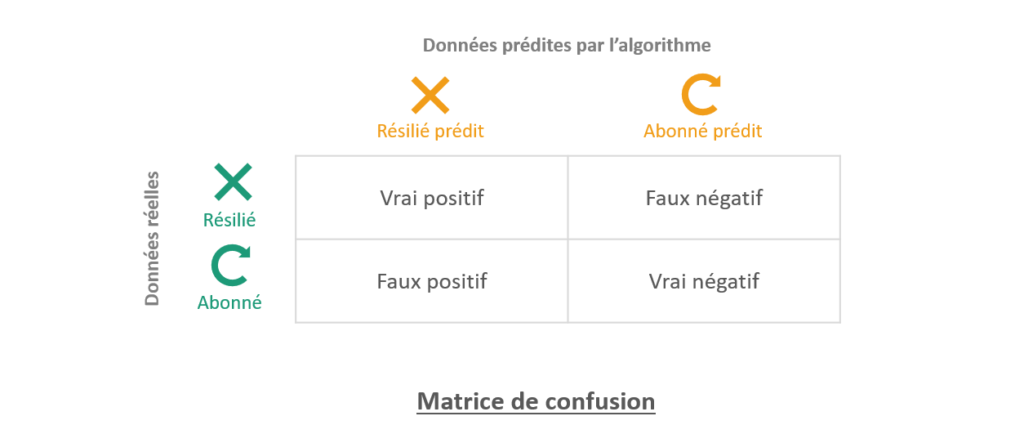


**Question :**
- En utilisant les labels de l'ensemble de test, complétez *kppv* afin de rajouter le calcul de la matrice de confusion et le taux d'erreur.
- Testez l'algorithme pour $k=1$ et $k=10$ et calculez les taux d'erreur respectifs.

In [ ]:
def confusion_matrix(y_true, y_pred):
    #On obtient les classes distinctes et leurs nombres
    y_true_no_duplicate = sorted(set(y_true))
    print('y_true_no_duplicate :', y_true_no_duplicate)

    n = len(y_true_no_duplicate)
    #On intialise la matricde de confusion
    matrix = np.zeros((n,n), dtype=np.int32)
    print('n = ',n)
    
    for i in range(len(y_true)):

        matrix[y_true_no_duplicate.index(y_true[i])][y_true_no_duplicate.index(str(int(y_pred[i])))] += 1
    
    return matrix

In [ ]:
def taux_erreur(cm):
    first_diagonal = np.diag(cm).sum()
    columns_sum = np.sum(cm)
    print(columns_sum)
    # le taux d'erreur représente la somme des colonnes 
    # moins les taux positifs qui sont stoqués dans la diagonale
    taux_err = (columns_sum - first_diagonal) / 100
    return taux_err

In [ ]:
def evalutation(y_true, y_pred, k):
  #calculer la matrice de confusion
  cm = confusion_matrix(y_true, y_pred)

  #représenter la matrice
  print(cm)

  plt.figure(figsize=(20, 10))
  labels= range(0,10)
  plt.subplot(1, 2, 1)
  plt.imshow(cm, cmap='Blues')

  #calculer le taux d'erreur 
  taux_err = taux_erreur(cm)
  print("pour k = ",k,"le taux d'erreur = ", taux_err)

## K = 1

In [ ]:
# Classement par aux k-ppv avec K = 3
Nt_test = int(Nt/100)
Nt_test = Nt
k = 3
Partition = kppv(DataApp, DataTest, LabelApp , K , Nt_test, True)

Streaming output truncated to the last 5000 lines.
Image test n 1891
true label :  2
predicted label :  2
________________________________
Image test n 1892
true label :  0
predicted label :  0
________________________________
Image test n 1893
true label :  8
predicted label :  8
________________________________
Image test n 1894
true label :  9
predicted label :  9
________________________________
Image test n 1895
true label :  2
predicted label :  2
________________________________
Image test n 1896
true label :  5
predicted label :  5
________________________________
Image test n 1897
true label :  1
predicted label :  1
________________________________
Image test n 1898
true label :  0
predicted label :  0
________________________________
Image test n 1899
true label :  8
predicted label :  8
________________________________
Image test n 1900
true label :  1
predicted label :  1
________________________________
Image test n 1901
true label :  9
predicted label :  4
______________

y_true_no_duplicate : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
n =  10
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
100
pour k =  3 le taux d'erreur =  0.01


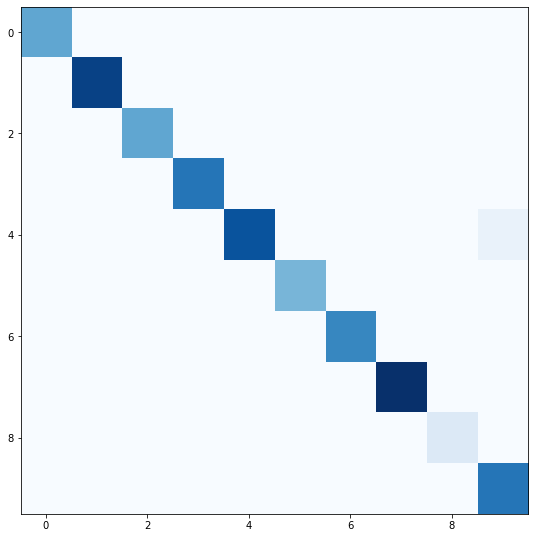

In [ ]:
evalutation(LabelTest[:Nt_test], Partition, k)

## K = 10

In [ ]:
# Classement par aux k-ppv avec K = 10
Nt_test = int(Nt/100)
k = 10
Partition = kppv(DataApp, DataTest, LabelApp , K , Nt_test, False)

y_true_no_duplicate : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
n =  10
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
100
pour k =  10 le taux d'erreur =  0.01


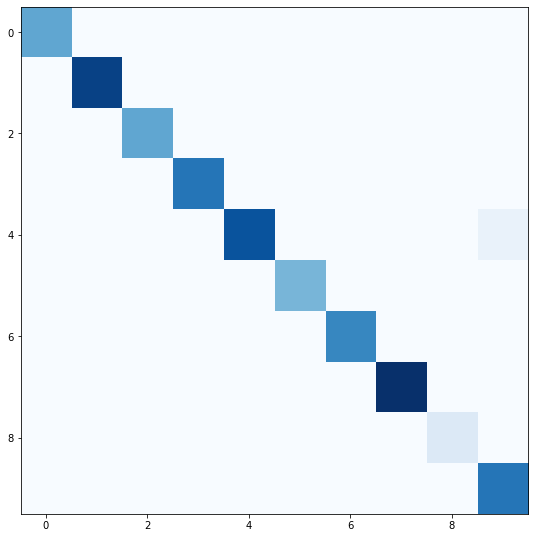

In [ ]:
evalutation(LabelTest[:Nt_test], Partition, k)